In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(rc={"figure.dpi": 160, 'figure.figsize':(16,8)})

label
Few w/ CoT     -0.168966
Few w/o CoT    -0.056887
Zero w/ CoT    -0.311454
Zero w/o CoT   -0.091530
Name: difference, dtype: float64
label
Few w/ CoT     -0.087764
Few w/o CoT    -0.022470
Zero w/ CoT    -0.215390
Zero w/o CoT   -0.056664
Name: difference, dtype: float64


<Axes: xlabel='Prompt Type', ylabel='Change in CodeBLEU Score'>

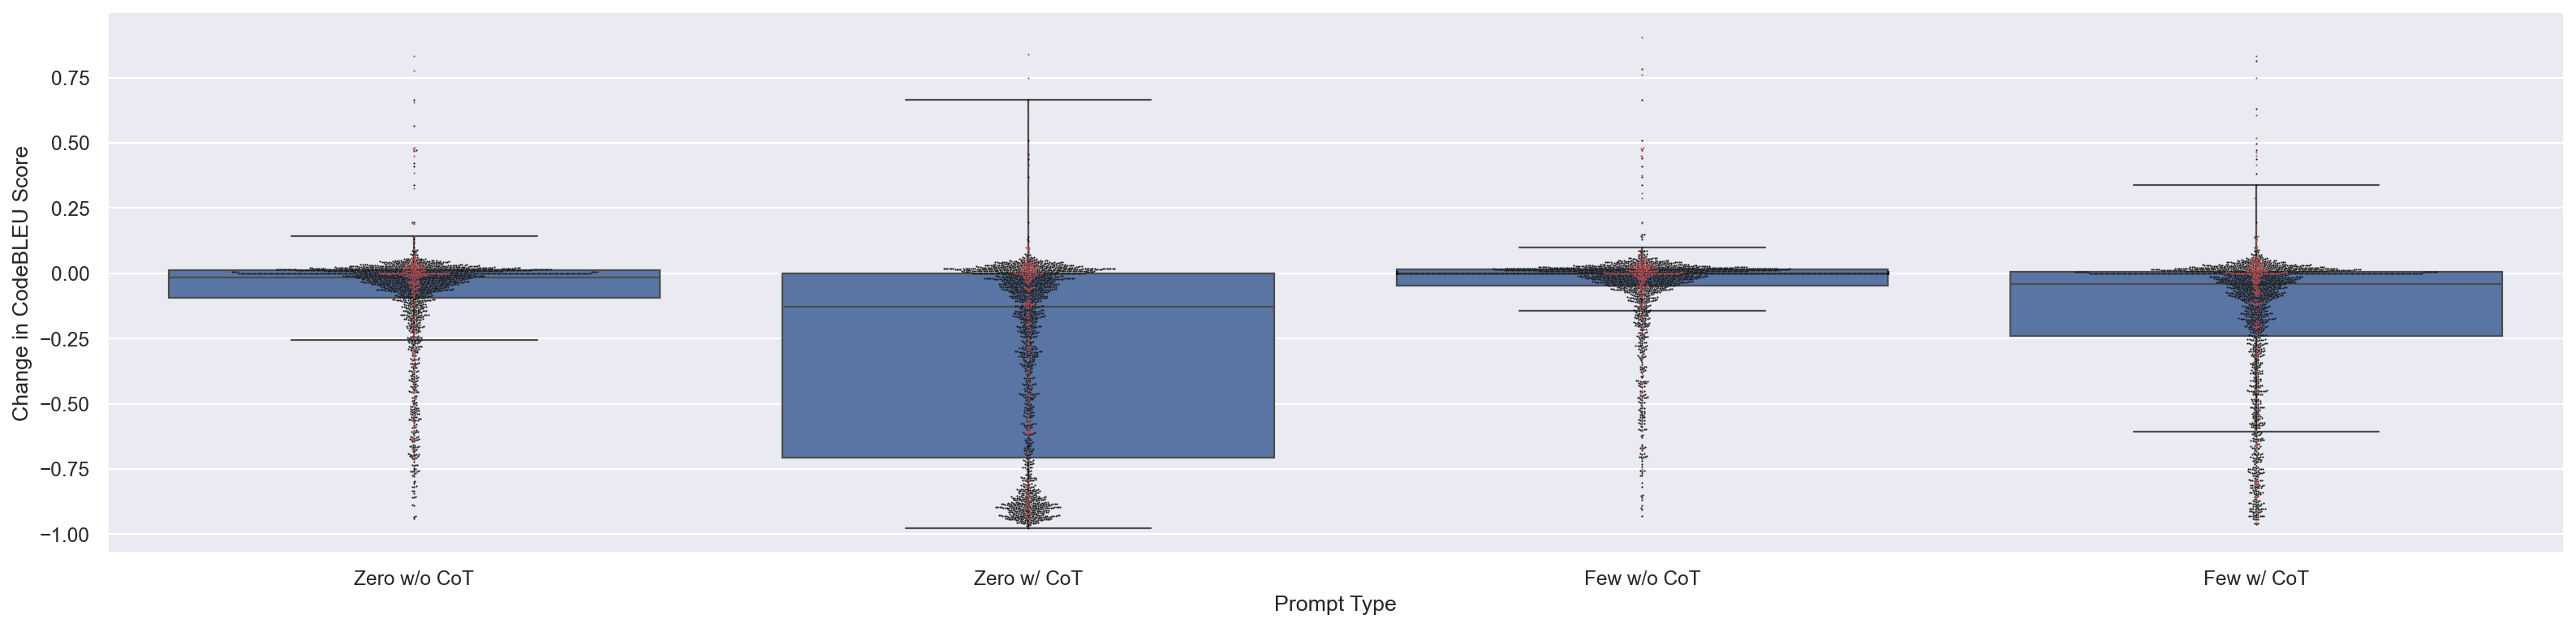

In [3]:

ce0n = pd.read_csv('codebleu_evals_0_n.csv')
ce0c = pd.read_csv('codebleu_evals_0_c.csv')
cefn = pd.read_csv('codebleu_evals_f_n.csv')
cefc = pd.read_csv('codebleu_evals_f_c.csv')

ce0ng = pd.read_csv('codebleu_evals_gpt_0_n.csv')
ce0cg = pd.read_csv('codebleu_evals_gpt_0_c.csv')
cefng = pd.read_csv('codebleu_evals_gpt_f_n.csv')
cefcg = pd.read_csv('codebleu_evals_gpt_f_c.csv')

# Add useless column with same value
ce0n["label"] = "Zero w/o CoT"
ce0c["label"] = "Zero w/ CoT"
cefn["label"] = "Few w/o CoT"
cefc["label"] = "Few w/ CoT"

ce0ng["label"] = "Zero w/o CoT"
ce0cg["label"] = "Zero w/ CoT"
cefng["label"] = "Few w/o CoT"
cefcg["label"] = "Few w/ CoT"

# Concatenate all dataframes
df = pd.concat([ce0n, ce0c, cefn, cefc])
dfg = pd.concat([ce0ng, ce0cg, cefng, cefcg])

# For each row, open "debugged_path" and read contents. Check length.
def get_debug_len(row):
    with open(row["debugged_path"], "r") as f:
        contents = f.read()
        return len(contents)
    
# Count number of ``` found in file contents
def count_backticks(row):
    with open(row["debugged_path"], "r") as f:
        contents = f.read()
        return contents.count("```")


#df["debug_len"] = df.apply(get_debug_len, axis=1)
#df["backticks"] = df.apply(count_backticks, axis=1)

# Print "difference" by label
print(df.groupby("label")["difference"].mean())
print(dfg.groupby("label")["difference"].mean())


g = sns.catplot(data=df, x="label", y="difference", kind="box", aspect=4, showfliers=False)
g.set_axis_labels("Prompt Type", "Change in CodeBLEU Score")

sns.swarmplot(data=df, x="label", y="difference", color="k", size=1, ax=g.ax)

#ndf = df[df["backticks"] == 0]
#ndf = pd.concat([df[df["backticks"] % 2 == 1], ndf])
sns.swarmplot(data=dfg, x="label", y="difference", color="r", size=1, ax=g.ax)

# Print "difference" by label of df, but this time with rows in ndf removed
# Remove ndf rows from df
#df = df[df["backticks"] != 0]
#df = df[df["backticks"] % 2 == 0]
#print(df.groupby("label")["difference"].mean())

# Zoom in to abs(difference) < 0.1
#plt.ylim(-0.4, 0.4)


[60, 301, 309, 310, 316, 328, 398, 410, 415, 432, 432, 438, 451, 456, 466, 471, 478, 489, 516, 527, 537, 549, 592, 609, 621, 622, 628, 645, 653, 678, 693, 705, 720, 731, 731, 749, 756, 757, 769, 842, 862, 870, 877, 885, 888, 892, 924, 930, 931, 934, 935, 946, 954, 958, 959, 959, 966, 983, 986, 1024, 1043, 1048, 1061, 1067, 1068, 1072, 1112, 1138, 1155, 1156, 1167, 1181, 1194, 1205, 1215, 1224, 1229, 1238, 1238, 1274, 1286, 1286, 1327, 1331, 1346, 1350, 1364, 1365, 1391, 1405, 1417, 1420, 1424, 1425, 1433, 1441, 1483, 1495, 1536, 1599, 1604, 1607, 1610, 1631, 1647, 1688, 1715, 1741, 1764, 1804, 1859, 1875, 1879, 1885, 1889, 1896, 1911, 1913, 1934, 1937, 1945, 1966, 1976, 1978, 1980, 1991, 2007, 2013, 2018, 2030, 2061, 2062, 2072, 2139, 2145, 2176, 2182, 2183, 2229, 2299]
label
Few w/ CoT      0.023854
Few w/o CoT    -0.003496
Zero w/ CoT    -0.045264
Zero w/o CoT   -0.006007
Name: difference, dtype: float64


c:\Users\Joseph\anaconda3\envs\deeplearning\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Joseph\anaconda3\envs\deeplearning\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Joseph\anaconda3\envs\deeplearning\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Joseph\anaconda3\envs\deeplearning\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Joseph\anaconda3\en

label
Few w/ CoT      0.036539
Few w/o CoT    -0.004531
Zero w/ CoT     0.032768
Zero w/o CoT   -0.006571
Name: difference, dtype: float64


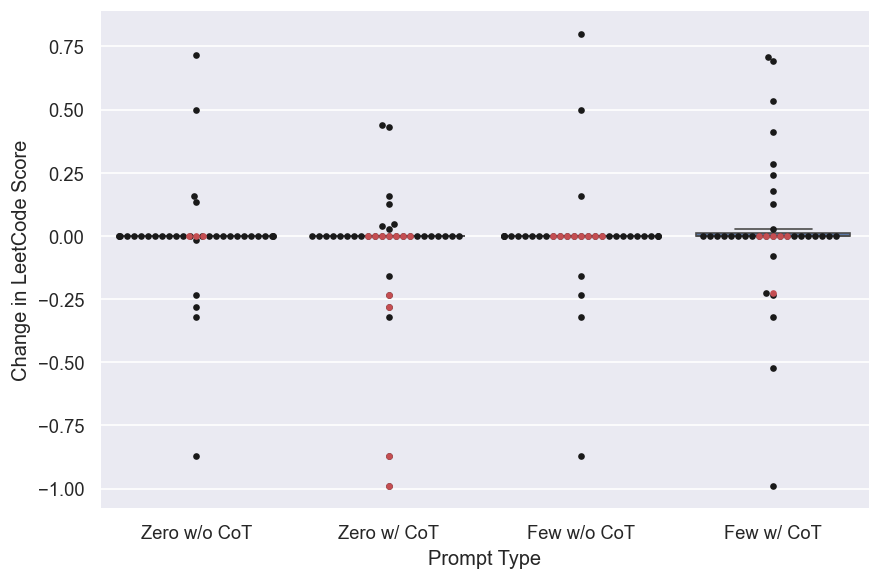

In [ ]:
ce0n = pd.read_csv("leetcode_gui/leetcode_evals_0_n.csv")
ce0c = pd.read_csv("leetcode_gui/leetcode_evals_0_c.csv")
cefn = pd.read_csv("leetcode_gui/leetcode_evals_f_n.csv")
cefc = pd.read_csv("leetcode_gui/leetcode_evals_f_c.csv")

# Add useless column with same value
ce0n["label"] = "Zero w/o CoT"
ce0c["label"] = "Zero w/ CoT"
cefn["label"] = "Few w/o CoT"
cefc["label"] = "Few w/ CoT"

# Concatenate all dataframes
df = pd.concat([ce0n, ce0c, cefn, cefc])

# For each row, open "debugged_path" and read contents. Check length.
def get_debug_len(row):
    with open(row["debugged_path"][3:], "r") as f:
        contents = f.read()
        return len(contents)
    
# Count number of ``` found in file contents
def count_backticks(row):
    with open(row["debugged_path"][3:], "r") as f:
        contents = f.read()
        return contents.count("```")


df["debug_len"] = df.apply(get_debug_len, axis=1)
df["backticks"] = df.apply(count_backticks, axis=1)
tmp = list(df["debug_len"])
tmp.sort()
print(tmp)

# Print "difference" by label
print(df.groupby("label")["difference"].mean())


g = sns.catplot(data=df, x="label", y="difference", kind="box", aspect=1.5, showfliers=False)
g.set_axis_labels("Prompt Type", "Change in LeetCode Score")

sns.swarmplot(data=df, x="label", y="difference", color="k", size=4, ax=g.ax)

ndf = df[df["backticks"] == 0]
ndf = pd.concat([df[df["backticks"] % 2 == 1], ndf])
sns.swarmplot(data=ndf, x="label", y="difference", color="r", size=4, ax=g.ax)

# Print "difference" by label of df, but this time with rows in ndf removed
# Remove ndf rows from df
df = df[df["backticks"] != 0]
df = df[df["backticks"] % 2 == 0]
print(df.groupby("label")["difference"].mean())

# Zoom in to abs(difference) < 0.1
#plt.ylim(-0.15, 0.15)


<Axes: xlabel='label', ylabel='difference'>

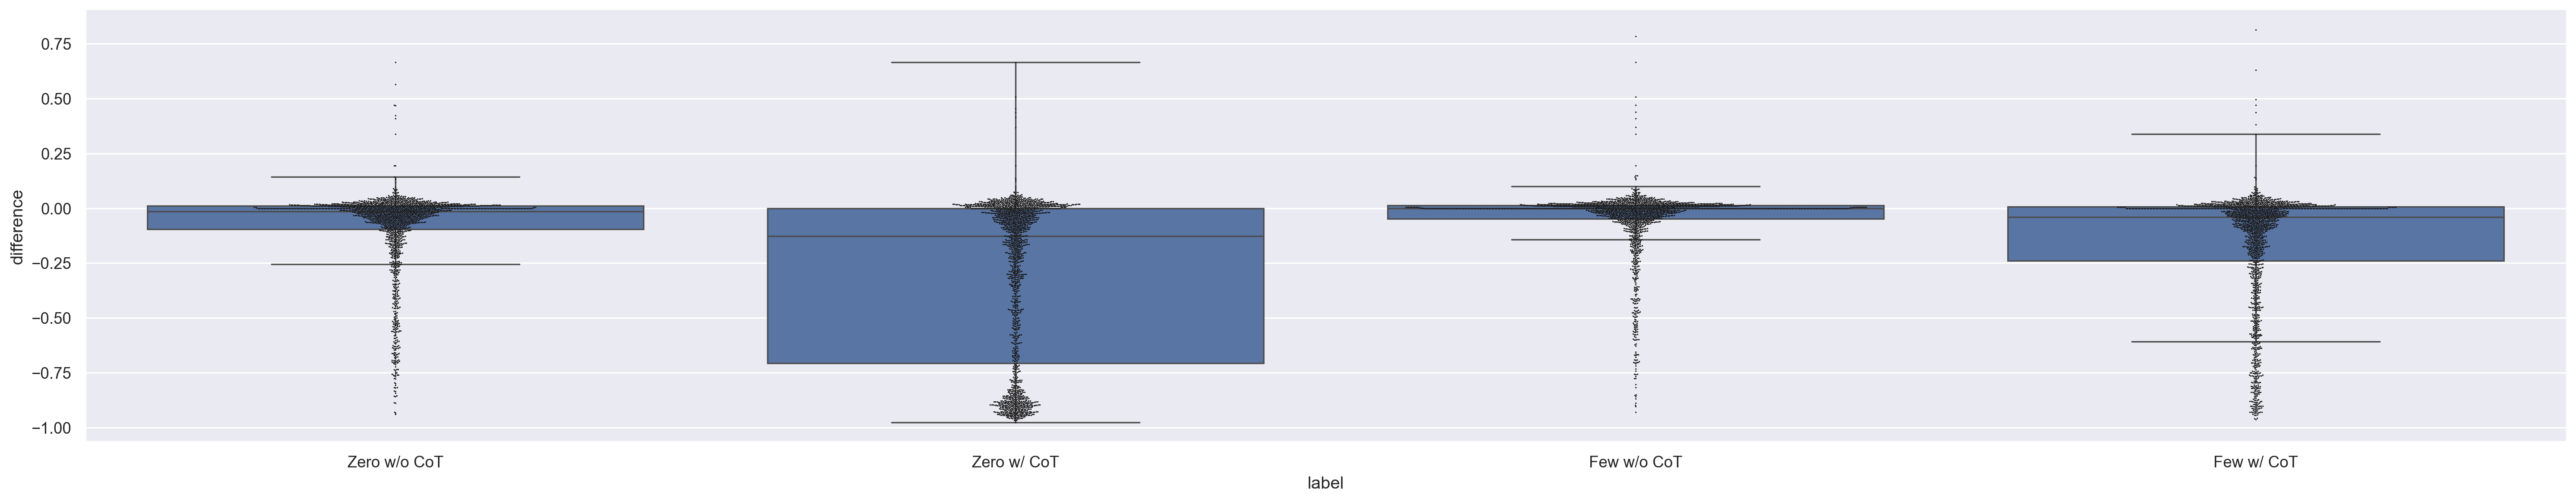

In [ ]:
# Concatenate all dataframes
df = pd.concat([ce0n, ce0c, cefn, cefc])


# Remove circles around outliers
g = sns.catplot(data=df, x="label", y="difference", kind="box", aspect=5, showfliers=False)
sns.swarmplot(data=df, x="label", y="difference", color="k", size=1, ax=g.ax)

# Zoom in to abs(difference) < 0.1
#plt.ylim(-0.15, 0.15)


-0.019664632799013607
-0.027573041323285318
-0.02102574304703133
-0.02812468137561228


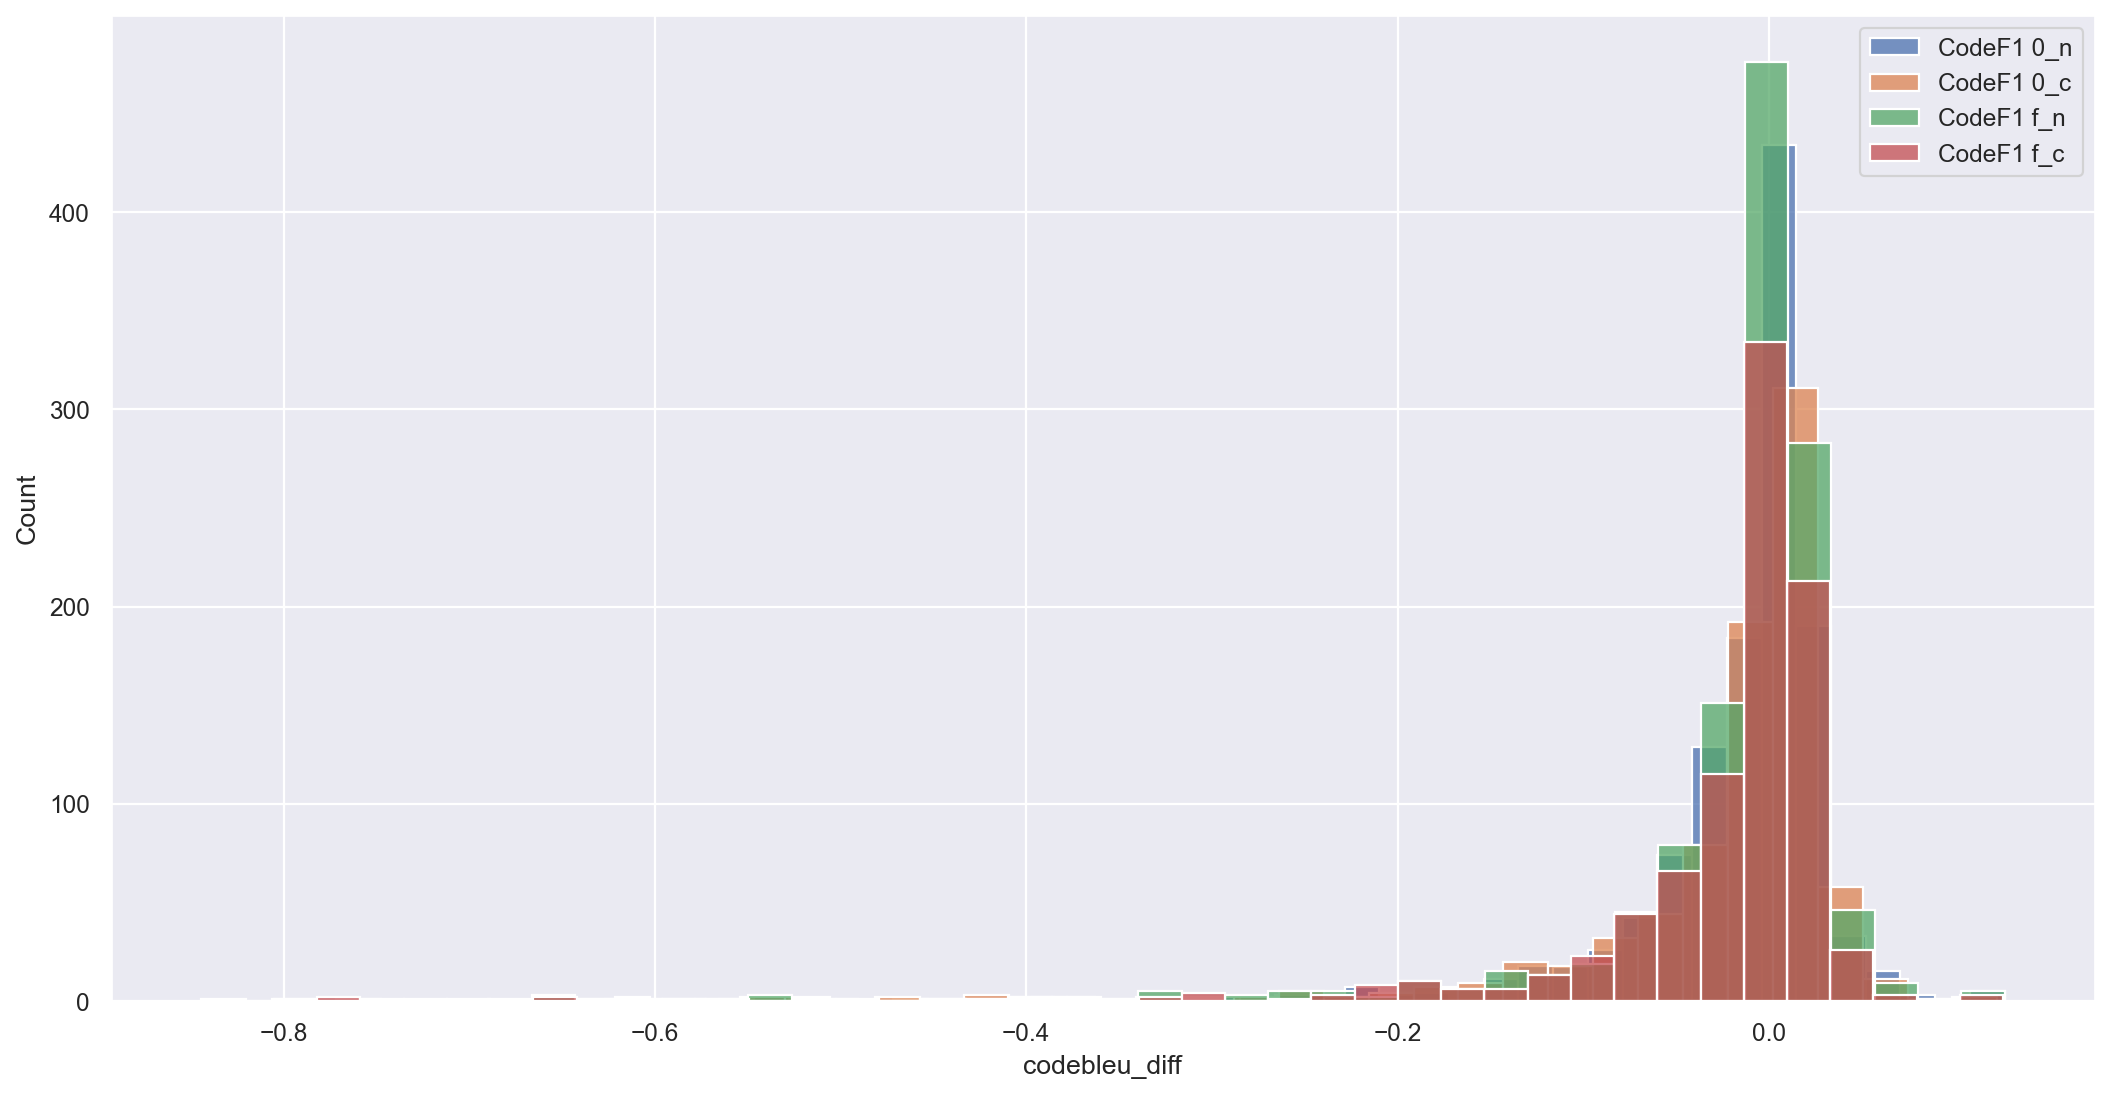

-0.021019918038099765
-0.029401237211713168
-0.021919479995602818
-0.030361178109304787


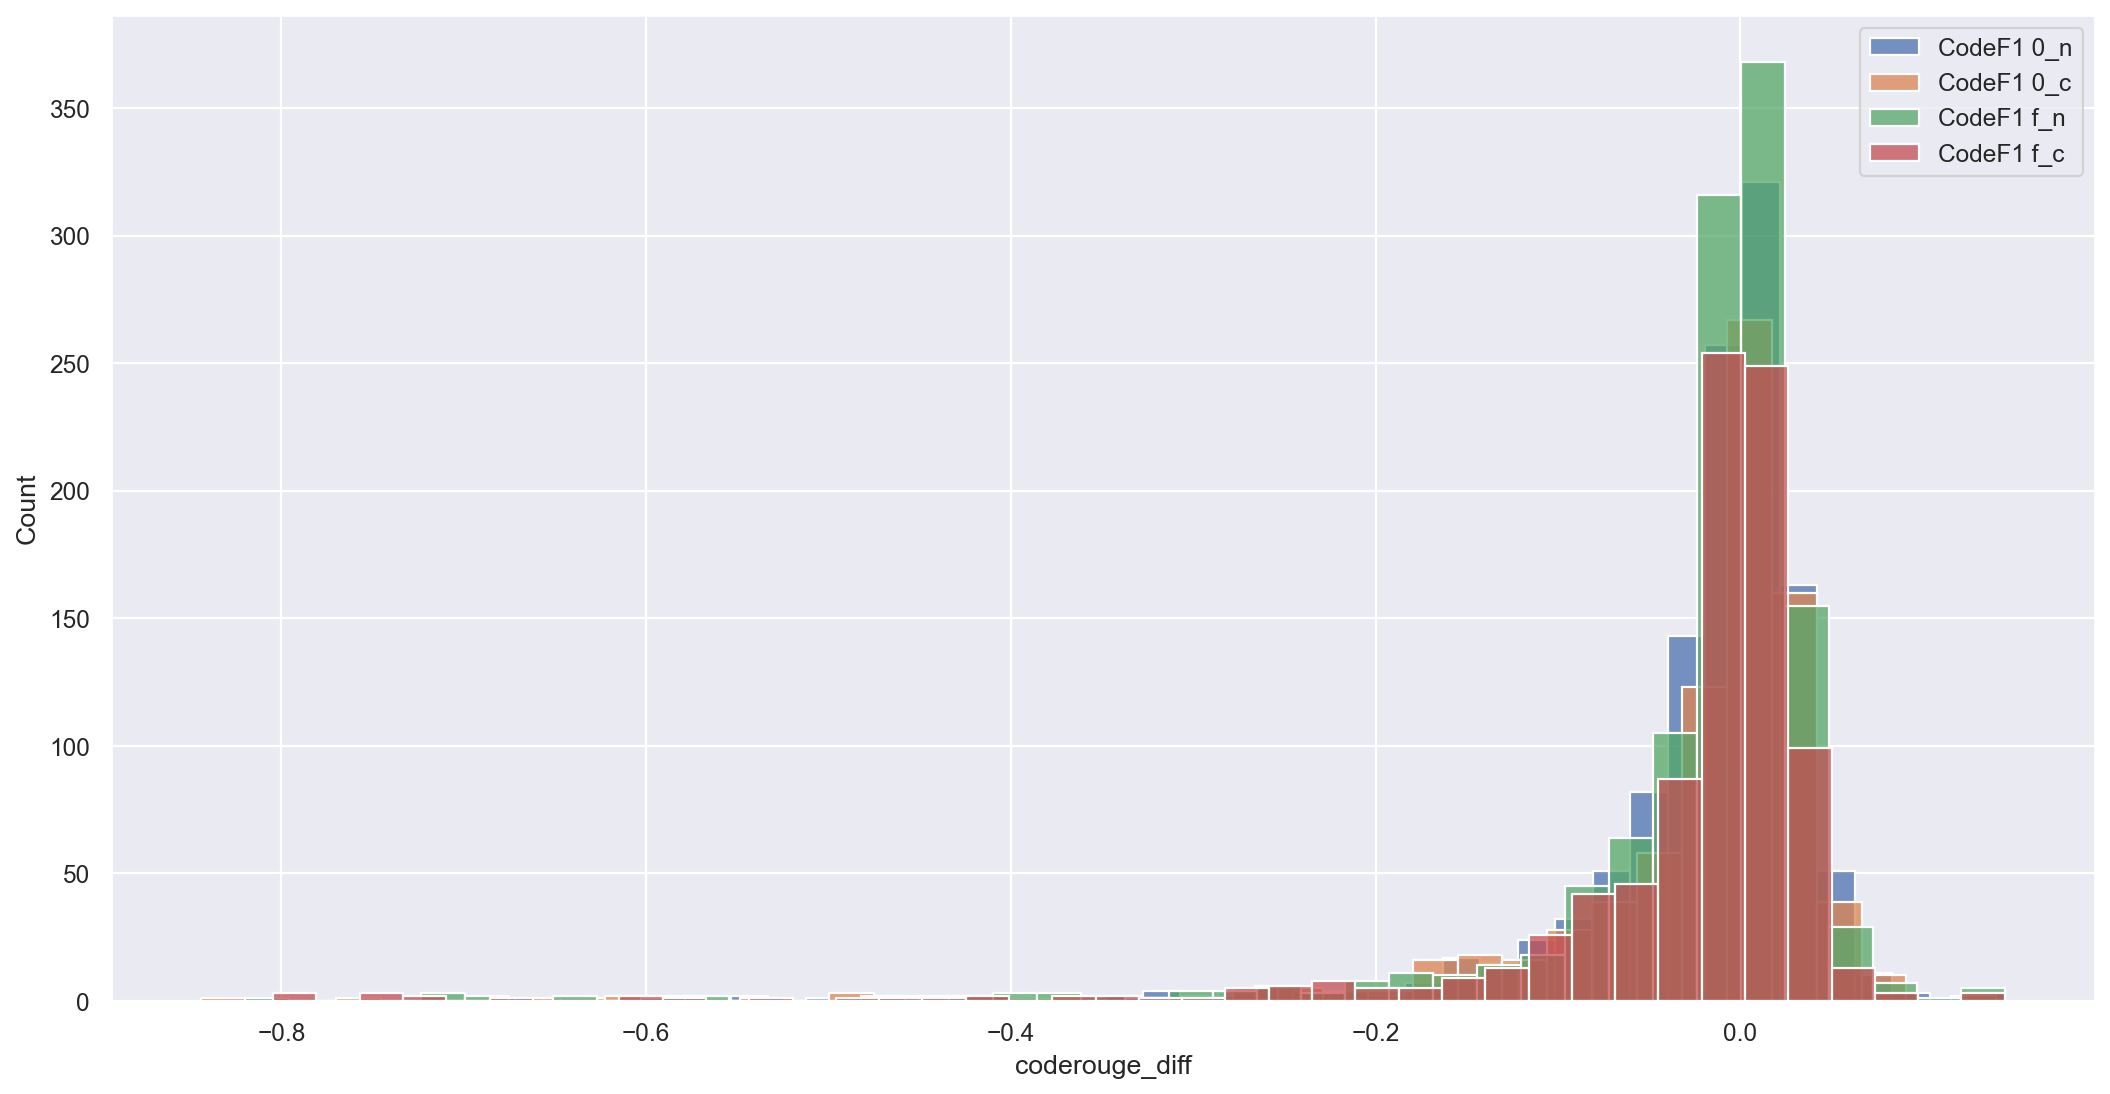

-0.020722816966033203
-0.02906514533191923
-0.021871682629331188
-0.029830982520966852


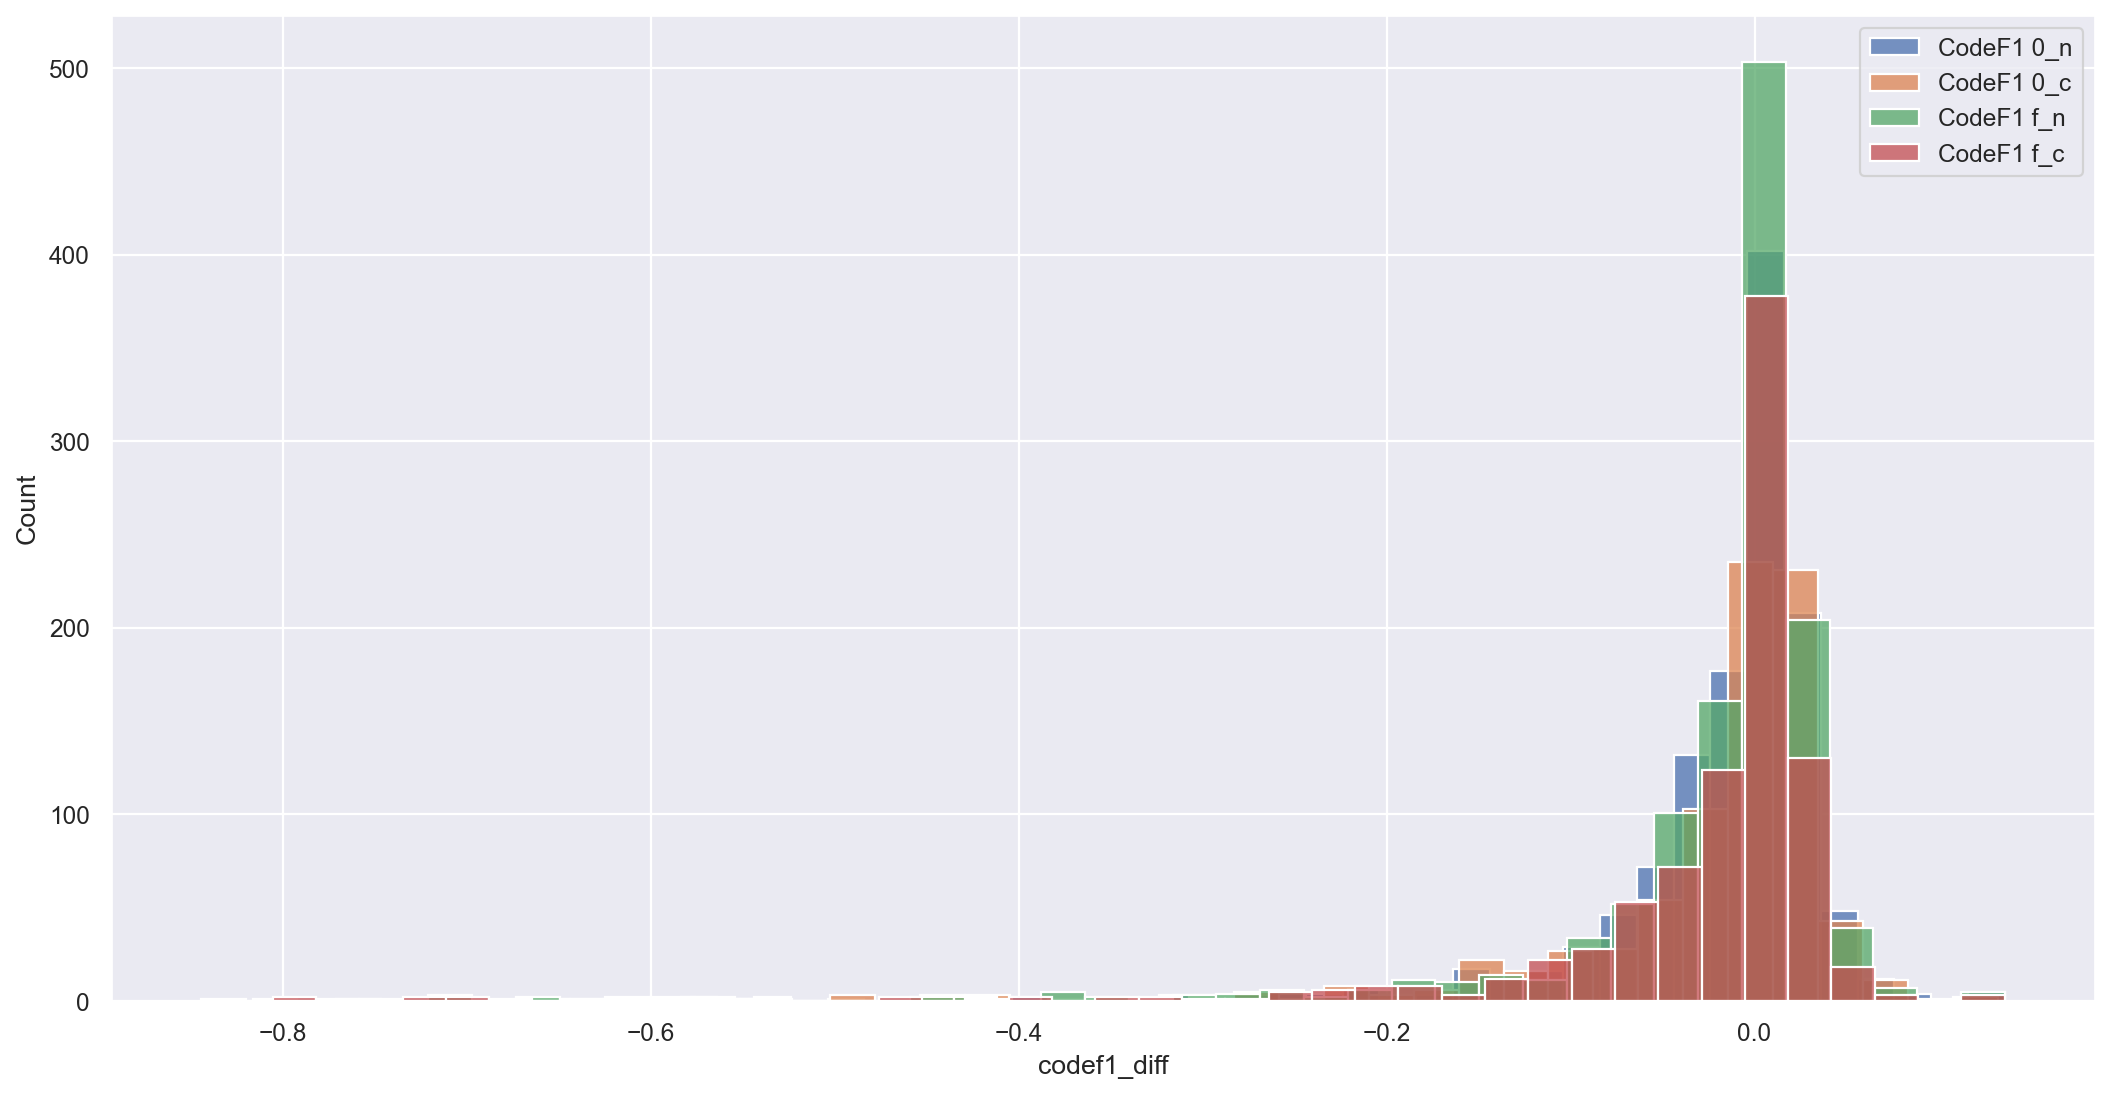

In [23]:
for nm in ['codef1_evals_desc_0_n.csv', 'codef1_evals_desc_0_c.csv', 'codef1_evals_desc_f_n.csv', 'codef1_evals_desc_f_c.csv']:
    f1s = pd.read_csv(nm)
    
    # Filter out all rows where pad_bug, pad_debugged, or pad_correct is True
    f1s = f1s[f1s["pad_bug"] == False]
    f1s = f1s[f1s["pad_debugged"] == False]
    f1s = f1s[f1s["pad_correct"] == False]
    f1s = f1s[f1s["truncated"] == False]

    # Find the distribution of codef1_diff, codebleu_diff, and coderouge_diff. Plot on one graph.
    sns.histplot(f1s["codebleu_diff"], label="CodeF1 " + nm[-7:-4], bins=40)
    print(f1s["codebleu_diff"].mean())

plt.legend()
plt.show()

for nm in ['codef1_evals_desc_0_n.csv', 'codef1_evals_desc_0_c.csv', 'codef1_evals_desc_f_n.csv', 'codef1_evals_desc_f_c.csv']:
    f1s = pd.read_csv(nm)

    # Filter out all rows where pad_bug, pad_debugged, or pad_correct is True
    f1s = f1s[f1s["pad_bug"] == False]
    f1s = f1s[f1s["pad_debugged"] == False]
    f1s = f1s[f1s["pad_correct"] == False]
    f1s = f1s[f1s["truncated"] == False]

    # Find the distribution of codef1_diff, codebleu_diff, and coderouge_diff. Plot on one graph.
    sns.histplot(f1s["coderouge_diff"], label="CodeF1 " + nm[-7:-4], bins=40)
    print(f1s["coderouge_diff"].mean())

plt.legend()
plt.show()

for nm in ['codef1_evals_desc_0_n.csv', 'codef1_evals_desc_0_c.csv', 'codef1_evals_desc_f_n.csv', 'codef1_evals_desc_f_c.csv']:
    f1s = pd.read_csv(nm)

    # Filter out all rows where pad_bug, pad_debugged, or pad_correct is True
    f1s = f1s[f1s["pad_bug"] == False]
    f1s = f1s[f1s["pad_debugged"] == False]
    f1s = f1s[f1s["pad_correct"] == False]
    f1s = f1s[f1s["truncated"] == False]

    # Find the distribution of codef1_diff, codebleu_diff, and coderouge_diff. Plot on one graph.
    sns.histplot(f1s["codef1_diff"], label="CodeF1 " + nm[-7:-4], bins=40)
    # Print average
    print(f1s["codef1_diff"].mean())

plt.legend()
plt.show()
